# Monitor de Segurança

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importações

In [2]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

### Parâmetros

In [6]:
MODEL_CONFIG = "/content/drive/MyDrive/50 Aplicações de IA/3.Segurança/MobileNetSSD_deploy.prototxt"
MODEL_WEIGHTS = "/content/drive/MyDrive/50 Aplicações de IA/3.Segurança/MobileNetSSD_deploy.caffemodel"
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]

### Modelo

In [7]:
net = cv2.dnn.readNetFromCaffe(MODEL_CONFIG, MODEL_WEIGHTS)

### Função de Detecção

In [12]:
def detect_person_in_video(video_path):
    cap = cv2.VideoCapture(video_path)

    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Fim do vídeo ou erro na leitura.")
            break

        frame_count += 1
        (h, w) = frame.shape[:2]

        blob = cv2.dnn.blobFromImage(frame, 0.007843, (300, 300), 127.5)
        net.setInput(blob)
        detections = net.forward()

        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.90:

                idx = int(detections[0, 0, i, 1])
                if CLASSES[idx] == "person":
                    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                    (startX, startY, endX, endY) = box.astype("int")

                    label = f"{CLASSES[idx]}: {confidence * 100:.2f}%"
                    cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
                    cv2.putText(frame, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                    print(f"Pessoa detectada no frame {frame_count}")
                    cv2_imshow(frame)

                    detected_frame_path = f"detected_frame_{frame_count}.jpg"
                    cv2.imwrite(detected_frame_path, frame)
                    print(f"Frame salvo como {detected_frame_path}")

                    cap.release()
                    return "Pessoa detectada no vídeo"

    cap.release()
    return "Nenhuma pessoa detectada no vídeo"

### Execução

Pessoa detectada no frame 117


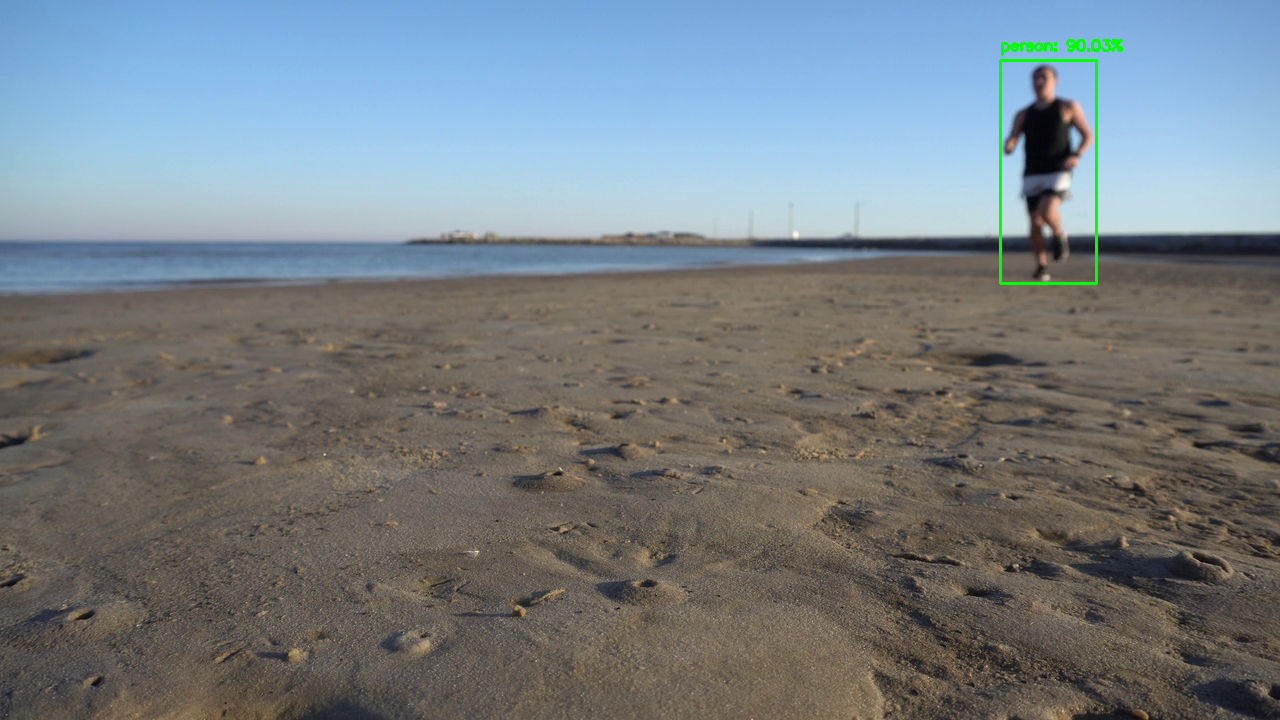

Frame salvo como detected_frame_117.jpg
Pessoa detectada no vídeo


In [13]:
video_path = "/content/drive/MyDrive/50 Aplicações de IA/3.Segurança/people.mp4"
print(detect_person_in_video(video_path))